# Distinguish Your Own Digits (DYOD)

> How do you create your own classifer neural network from scratch? 

- author: Sakthisree

Hola!

![](my_icons/hi.jpg)

As part of the Univ.ai KTF-1 course, I created this solution for one of the project questions. 

### Write a classifier that distinguishes the number 8 & number 3.

Gee. This might seem like a really simple question as first. 

>"Well, let's use scikit learn and all the other libraries we have and create a classifier in 3 lines."

But no. Let's use the Kudzu library - which I coded from scratch - where all the implementation for running a neural network is written from scratch. 

Credits to Rahul (& of course, Joe Grus) for wonderfully showing how simple a neural network can be coded. 

Throughout this project, I make use of the Kudzu libray to run the models. 

Towards the end, you can also see a visualization of how the computer "splits" 3 & 8. 

Some of the things I have altered in the Kudzu library: 
Added extra functions in the Callbacks call; Added tqdm for visualizing progress; Added softmax activation and softmax prime function. 

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#hide
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#hide
!pip install mnist

## Preparing the Data

> "What is MNIST anyway?"

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

It was created by "re-mixing" the samples from NIST's original datasets.

The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.

Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images.

Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset

Source:  Wikipedia


In [4]:
#hide
import mnist

In [5]:
#hide
#Loading the train images and labels from mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
#hide
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
#hide
#Loading the test images and labels from mnist
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
#hide
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

Let's take a look at how this data looks like.

2


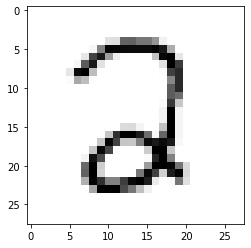

In [9]:
#collapse
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

Now in order to create our classifier, we must filter our 3s and 8s from the lot. 

In [10]:
#filtering the 3 and 8 data - splitting it into test and train
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

In [11]:
#hide
#just storing all my 3 data in one variable for later use
data_3 = train_images[np.where(train_labels == 3)]
data_3 = data_3/255.
data_3 = data_3.reshape(data_3.shape[0], -1)
data_3.shape

(6131, 784)

In [12]:
#hide
#just storing all my 8 data in one variable for later use
data_8 = train_images[np.where(train_labels == 8)]
data_8 = data_8/255.
data_8 = data_8.reshape(data_8.shape[0], -1)
data_8.shape

(5851, 784)

We normalize the pizel values in the 0 to 1 range

In [13]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [14]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [15]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [16]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [17]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train.shape, y_test.shape 

((11982, 1), (1984, 1))

# So how does this work?

![](my_icons/what.jpg)

In regression, we saw our model outputting numerical values. 

But in the case of logistic regression, our model will instead be spewing out probability values of the given input belonging to a certain class. 

This is based on the premise the the input space can in fact be seperated into two seperate 'regions'(in the case of 2 classes) by a linear boundary.

Ideally, in the case of two dimensions, our linear boundary would be a line. For three dimensions, it would end up being a plane. For higher dimensions, we would call this boundary as a 'hyperplane'.


$$
\begin{eqnarray}
y = 1 & ,\,\, & {w}\cdot{x} + b \ge 0\\
y = 0 & ,\,\, & {w}\cdot{x} + b < 0
\end{eqnarray}
$$

Consider the **sigmoid** function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

with the identification:

$$z = {w}\cdot{x} + b$$ 

At $z=0$ this function has the value 0.5. 

If $z > 0$, $h > 0.5$ and as $z \to \infty$, $h \to 1$. 

If $z < 0$, $h < 0.5$ and as $z \to -\infty$, $h \to 0$. 

Through Maximum Likelihood estimation, we can then arrive at our log likelihood. 

$$L = P(y \mid {x},{w}).$$ 

$$l = log L = log(P(y \mid {x},{w})).$$


Thus

$$\begin{eqnarray}
l &=& log\left(\prod_{y_i \in \cal{D}} h({w}\cdot{x_i} + b)^{y_i} \left(1 - h({w}\cdot{x_i} + b) \right)^{(1-y_i)}\right)\\
                  &=& \sum_{y_i \in \cal{D}} log\left(h({w}\cdot{x_i} + b)^{y_i} \left(1 - h({w}\cdot{x_i} + b) \right)^{(1-y_i)}\right)\\                  
                  &=& \sum_{y_i \in \cal{D}} log\,h({w}\cdot{x_i} + b)^{y_i} + log\,\left(1 - h({w}\cdot{x_i} + b) \right)^{(1-y_i)}\\
                  &=& \sum_{y_i \in \cal{D}} \left ( y_i log(h({w}\cdot{x_i} + b)) + ( 1 - y_i) log(1 - h({w}\cdot{x_i} + b)) \right )
\end{eqnarray}$$

The negative of this log likelihood (henceforth abbreviated NLL), is also called the **Binary Cross-Entropy** aka Negative Log likelihood.

$$ NLL = - \sum_{y_i \in \cal{D}} \left ( y_i log(h({w}\cdot{x})) + ( 1 - y_i) log(1 - h({w}\cdot{x})) \right )$$

## Neural Network

For our neural network, we need to use this cost function in order to find the gradient and perform gradient descent. 

The general sequence of how data is passed through a neural network layers. 

These layers are mostly of the sequence:
1. Linear transformation or affine layer
2. Non-linear transformation or activation layer
3. Cost function calculation

This is known as forward propogation. 

In the case of backward propogation, the cost function is used to calculate the gradient and find the direction in which to move towards the global minima of loss. 

This is done by going in the reverse or backward phase - we now propagate the derivatives backward through the layer cake. 

The weights are then updated through means of the derivatives calculated by the chain rule. 

It is also important to note that a learning rate is initialized so as to control the "length" of the step towards the minima. 

If the step is too long, you might end up jumping to the next mountain. 

If your step is too short, you might end up camping at night for three days, almost getting mauled by bears, before you reach the minima. 


### 1. I use the following configuration (or similar) to set up the model for training.

```python
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50
```

Now construct a model which has the following layers

1. A first affine layer which has 784 inputs and does 100 affine transforms. These are followed by a `Relu`
2. A second affine layer which has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a `Relu`
3. A third affine layer which has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
4. A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

In [18]:
#hide
from kudzu.model import Model
from kudzu.layer import Affine, Sigmoid, Relu
from kudzu.loss import BCE
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler
from kudzu.train import Learner
from kudzu.callbacks import AccCallback

In [19]:
#hide
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50

In [20]:
train_data = Data(X_train, y_train)
loss = BCE()
opt = GD(config.lr)
sampler = Sampler(train_data, config.bs, shuffle=True)
train_dl = Dataloader(train_data, sampler)

In [21]:
layers = [Affine("first", 784, 100), Relu("relu"), Affine("second", 100, 100), Relu("relu"), Affine("third", 100, 2), Affine("output", 2, 1), Sigmoid("sigmoid")]
model = Model(layers)

### 2. Create a callback class

I further added code to the  AccCallback class to add in the following functionalities. 

1. Initialized it to have accuracy arrays 

```python
self.accuracies = []
self.test_accuracies = []
```
2. Then at the end of each epoch, calculated the probabilities and hence predictions on both the training set and the test set. Printed these out once per epoch. 

3. Acumulated these in the above array. This will require me to keep track of all 4 training and test sets. 

4. I edited the `Learner` for this or pass these sets in some kind of data object to the callback.

5. I also added tqdm functionality in the AccCallback class in order to visually see the batch running progress per epoch.

In [22]:
learner = Learner(loss, model, opt, config.num_epochs)
acc = AccCallback(learner, config.bs)
learner.set_callbacks([acc])

### 3. Train the model

In [23]:
#hide
learner.train_loop(train_dl, X_test, y_test)

Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.64it/s]


Epoch: 0     Loss: 0.66262     Training Acc: 0.56802     Validation Acc: 0.73891


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.85it/s]


Epoch: 1     Loss: 0.60085     Training Acc: 0.77992     Validation Acc: 0.79713


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 276.20it/s]


Epoch: 2     Loss: 0.54137     Training Acc: 0.84969     Validation Acc: 0.82712


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.61it/s]


Epoch: 3     Loss: 0.47431     Training Acc: 0.87573     Validation Acc: 0.84463


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 276.75it/s]


Epoch: 4     Loss: 0.40599     Training Acc: 0.89025     Validation Acc: 0.85746


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.61it/s]


Epoch: 5     Loss: 0.34625     Training Acc: 0.9021     Validation Acc: 0.86778


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.43it/s]


Epoch: 6     Loss: 0.29871     Training Acc: 0.91212     Validation Acc: 0.87673


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.26it/s]


Epoch: 7     Loss: 0.26243     Training Acc: 0.91854     Validation Acc: 0.88407


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 246.18it/s]


Epoch: 8     Loss: 0.23482     Training Acc: 0.92597     Validation Acc: 0.89029


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 256.23it/s]


Epoch: 9     Loss: 0.21362     Training Acc: 0.93131     Validation Acc: 0.89582


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 264.97it/s]


Epoch: 10     Loss: 0.19721     Training Acc: 0.93607     Validation Acc: 0.90075


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 249.68it/s]


Epoch: 11     Loss: 0.1841     Training Acc: 0.93983     Validation Acc: 0.90507


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 268.24it/s]


Epoch: 12     Loss: 0.1735     Training Acc: 0.9415     Validation Acc: 0.90896


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 264.41it/s]


Epoch: 13     Loss: 0.16478     Training Acc: 0.94383     Validation Acc: 0.91237


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.20it/s]


Epoch: 14     Loss: 0.15752     Training Acc: 0.94667     Validation Acc: 0.91552


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.68it/s]


Epoch: 15     Loss: 0.15141     Training Acc: 0.94851     Validation Acc: 0.9185


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.88it/s]


Epoch: 16     Loss: 0.14607     Training Acc: 0.95034     Validation Acc: 0.9211


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.05it/s]


Epoch: 17     Loss: 0.14151     Training Acc: 0.9526     Validation Acc: 0.92344


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.64it/s]


Epoch: 18     Loss: 0.13733     Training Acc: 0.95485     Validation Acc: 0.92564


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.80it/s]


Epoch: 19     Loss: 0.13395     Training Acc: 0.95602     Validation Acc: 0.92765


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.62it/s]


Epoch: 20     Loss: 0.13065     Training Acc: 0.9566     Validation Acc: 0.92944


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.35it/s]


Epoch: 21     Loss: 0.12771     Training Acc: 0.95794     Validation Acc: 0.93102


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.14it/s]


Epoch: 22     Loss: 0.12517     Training Acc: 0.95869     Validation Acc: 0.93253


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.86it/s]


Epoch: 23     Loss: 0.12274     Training Acc: 0.95961     Validation Acc: 0.93393


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.12it/s]


Epoch: 24     Loss: 0.12048     Training Acc: 0.96011     Validation Acc: 0.9352


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.22it/s]


Epoch: 25     Loss: 0.11839     Training Acc: 0.96061     Validation Acc: 0.9364


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.47it/s]


Epoch: 26     Loss: 0.11656     Training Acc: 0.96203     Validation Acc: 0.93746


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.00it/s]


Epoch: 27     Loss: 0.11475     Training Acc: 0.96253     Validation Acc: 0.93851


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.98it/s]


Epoch: 28     Loss: 0.11307     Training Acc: 0.96319     Validation Acc: 0.93953


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.07it/s]


Epoch: 29     Loss: 0.11153     Training Acc: 0.9637     Validation Acc: 0.94049


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.32it/s]


Epoch: 30     Loss: 0.11003     Training Acc: 0.96395     Validation Acc: 0.94142


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.07it/s]


Epoch: 31     Loss: 0.10861     Training Acc: 0.96445     Validation Acc: 0.94227


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.28it/s]


Epoch: 32     Loss: 0.10728     Training Acc: 0.96461     Validation Acc: 0.94311


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 298.25it/s]


Epoch: 33     Loss: 0.10596     Training Acc: 0.96511     Validation Acc: 0.94389


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 296.29it/s]


Epoch: 34     Loss: 0.10467     Training Acc: 0.96536     Validation Acc: 0.94463


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 296.74it/s]


Epoch: 35     Loss: 0.10355     Training Acc: 0.96578     Validation Acc: 0.94534


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.31it/s]


Epoch: 36     Loss: 0.10237     Training Acc: 0.96628     Validation Acc: 0.94601


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.83it/s]


Epoch: 37     Loss: 0.10135     Training Acc: 0.96695     Validation Acc: 0.94671


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.46it/s]


Epoch: 38     Loss: 0.10026     Training Acc: 0.96712     Validation Acc: 0.94737


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.72it/s]


Epoch: 39     Loss: 0.09925     Training Acc: 0.96762     Validation Acc: 0.948


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.30it/s]


Epoch: 40     Loss: 0.0983     Training Acc: 0.9677     Validation Acc: 0.94858


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.85it/s]


Epoch: 41     Loss: 0.09732     Training Acc: 0.96812     Validation Acc: 0.94914


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.32it/s]


Epoch: 42     Loss: 0.09629     Training Acc: 0.96904     Validation Acc: 0.94967


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.77it/s]


Epoch: 43     Loss: 0.09553     Training Acc: 0.96904     Validation Acc: 0.95018


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.71it/s]


Epoch: 44     Loss: 0.09464     Training Acc: 0.96937     Validation Acc: 0.95071


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.98it/s]


Epoch: 45     Loss: 0.09376     Training Acc: 0.96937     Validation Acc: 0.9512


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.33it/s]


Epoch: 46     Loss: 0.09284     Training Acc: 0.96987     Validation Acc: 0.95168


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 298.84it/s]


Epoch: 47     Loss: 0.09204     Training Acc: 0.97004     Validation Acc: 0.95215


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.89it/s]


Epoch: 48     Loss: 0.09129     Training Acc: 0.97046     Validation Acc: 0.9526


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.05it/s]


Epoch: 49     Loss: 0.09049     Training Acc: 0.97062     Validation Acc: 0.95303


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 296.31it/s]


Epoch: 50     Loss: 0.08968     Training Acc: 0.97096     Validation Acc: 0.95345


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 295.58it/s]


Epoch: 51     Loss: 0.08903     Training Acc: 0.97096     Validation Acc: 0.95385


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 296.34it/s]


Epoch: 52     Loss: 0.08826     Training Acc: 0.97146     Validation Acc: 0.95425


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 295.93it/s]


Epoch: 53     Loss: 0.08753     Training Acc: 0.97204     Validation Acc: 0.95463


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 297.26it/s]


Epoch: 54     Loss: 0.08679     Training Acc: 0.97229     Validation Acc: 0.95499


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.56it/s]


Epoch: 55     Loss: 0.08612     Training Acc: 0.97238     Validation Acc: 0.95534


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 298.38it/s]


Epoch: 56     Loss: 0.08544     Training Acc: 0.97271     Validation Acc: 0.95567


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 295.52it/s]


Epoch: 57     Loss: 0.08471     Training Acc: 0.97271     Validation Acc: 0.95599


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.49it/s]


Epoch: 58     Loss: 0.08409     Training Acc: 0.97271     Validation Acc: 0.95631


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.42it/s]


Epoch: 59     Loss: 0.08342     Training Acc: 0.97346     Validation Acc: 0.95662


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.43it/s]


Epoch: 60     Loss: 0.08274     Training Acc: 0.97354     Validation Acc: 0.95693


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 295.29it/s]


Epoch: 61     Loss: 0.08216     Training Acc: 0.97354     Validation Acc: 0.95722


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.11it/s]


Epoch: 62     Loss: 0.08153     Training Acc: 0.97396     Validation Acc: 0.95751


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 271.56it/s]


Epoch: 63     Loss: 0.08093     Training Acc: 0.97388     Validation Acc: 0.95779


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.09it/s]


Epoch: 64     Loss: 0.08029     Training Acc: 0.97455     Validation Acc: 0.95806


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.63it/s]


Epoch: 65     Loss: 0.07969     Training Acc: 0.97438     Validation Acc: 0.95832


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.66it/s]


Epoch: 66     Loss: 0.07911     Training Acc: 0.97463     Validation Acc: 0.95857


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 282.00it/s]


Epoch: 67     Loss: 0.07849     Training Acc: 0.97496     Validation Acc: 0.95883


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 276.04it/s]


Epoch: 68     Loss: 0.07794     Training Acc: 0.97505     Validation Acc: 0.95908


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 270.79it/s]


Epoch: 69     Loss: 0.07738     Training Acc: 0.97546     Validation Acc: 0.95932


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 258.48it/s]


Epoch: 70     Loss: 0.07677     Training Acc: 0.97596     Validation Acc: 0.95957


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 271.24it/s]


Epoch: 71     Loss: 0.07625     Training Acc: 0.97655     Validation Acc: 0.9598


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.94it/s]


Epoch: 72     Loss: 0.07573     Training Acc: 0.9763     Validation Acc: 0.96004


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.90it/s]


Epoch: 73     Loss: 0.07519     Training Acc: 0.97663     Validation Acc: 0.96026


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.25it/s]


Epoch: 74     Loss: 0.07466     Training Acc: 0.97738     Validation Acc: 0.96048


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.25it/s]


Epoch: 75     Loss: 0.07413     Training Acc: 0.97755     Validation Acc: 0.96071


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.83it/s]


Epoch: 76     Loss: 0.07364     Training Acc: 0.97747     Validation Acc: 0.96091


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.20it/s]


Epoch: 77     Loss: 0.07312     Training Acc: 0.97772     Validation Acc: 0.96112


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.52it/s]


Epoch: 78     Loss: 0.07255     Training Acc: 0.9778     Validation Acc: 0.96132


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.59it/s]


Epoch: 79     Loss: 0.07204     Training Acc: 0.97822     Validation Acc: 0.96151


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.76it/s]


Epoch: 80     Loss: 0.07152     Training Acc: 0.97847     Validation Acc: 0.96171


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.04it/s]


Epoch: 81     Loss: 0.07109     Training Acc: 0.97863     Validation Acc: 0.9619


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 295.79it/s]


Epoch: 82     Loss: 0.07056     Training Acc: 0.9788     Validation Acc: 0.96211


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.33it/s]


Epoch: 83     Loss: 0.0701     Training Acc: 0.97922     Validation Acc: 0.96231


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.36it/s]


Epoch: 84     Loss: 0.06961     Training Acc: 0.97897     Validation Acc: 0.9625


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 277.73it/s]


Epoch: 85     Loss: 0.06914     Training Acc: 0.97964     Validation Acc: 0.9627


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.79it/s]


Epoch: 86     Loss: 0.06866     Training Acc: 0.9798     Validation Acc: 0.96289


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.19it/s]


Epoch: 87     Loss: 0.06818     Training Acc: 0.97989     Validation Acc: 0.96307


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.76it/s]


Epoch: 88     Loss: 0.06771     Training Acc: 0.98005     Validation Acc: 0.96326


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.60it/s]


Epoch: 89     Loss: 0.06724     Training Acc: 0.98022     Validation Acc: 0.96344


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.74it/s]


Epoch: 90     Loss: 0.06681     Training Acc: 0.9803     Validation Acc: 0.9636


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.75it/s]


Epoch: 91     Loss: 0.06636     Training Acc: 0.98064     Validation Acc: 0.96378


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.66it/s]


Epoch: 92     Loss: 0.06587     Training Acc: 0.98039     Validation Acc: 0.96394


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.41it/s]


Epoch: 93     Loss: 0.06546     Training Acc: 0.98097     Validation Acc: 0.96411


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.29it/s]


Epoch: 94     Loss: 0.065     Training Acc: 0.98089     Validation Acc: 0.96427


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.96it/s]


Epoch: 95     Loss: 0.06459     Training Acc: 0.9808     Validation Acc: 0.96442


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.26it/s]


Epoch: 96     Loss: 0.06414     Training Acc: 0.98105     Validation Acc: 0.96458


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.74it/s]


Epoch: 97     Loss: 0.06367     Training Acc: 0.98131     Validation Acc: 0.96473


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.82it/s]


Epoch: 98     Loss: 0.06325     Training Acc: 0.98139     Validation Acc: 0.96488


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 282.16it/s]


Epoch: 99     Loss: 0.06279     Training Acc: 0.98156     Validation Acc: 0.96502


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 298.66it/s]


Epoch: 100     Loss: 0.06238     Training Acc: 0.98147     Validation Acc: 0.96517


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.17it/s]


Epoch: 101     Loss: 0.06198     Training Acc: 0.98222     Validation Acc: 0.96531


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 279.22it/s]


Epoch: 102     Loss: 0.06146     Training Acc: 0.98197     Validation Acc: 0.96544


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.50it/s]


Epoch: 103     Loss: 0.06111     Training Acc: 0.98222     Validation Acc: 0.96558


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.00it/s]


Epoch: 104     Loss: 0.06064     Training Acc: 0.98197     Validation Acc: 0.96572


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.25it/s]


Epoch: 105     Loss: 0.06029     Training Acc: 0.98281     Validation Acc: 0.96584


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.12it/s]


Epoch: 106     Loss: 0.05984     Training Acc: 0.98272     Validation Acc: 0.96598


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.84it/s]


Epoch: 107     Loss: 0.05944     Training Acc: 0.98281     Validation Acc: 0.9661


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 279.40it/s]


Epoch: 108     Loss: 0.05902     Training Acc: 0.98281     Validation Acc: 0.96623


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.01it/s]


Epoch: 109     Loss: 0.05862     Training Acc: 0.98306     Validation Acc: 0.96635


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.29it/s]


Epoch: 110     Loss: 0.05822     Training Acc: 0.98348     Validation Acc: 0.96648


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.88it/s]


Epoch: 111     Loss: 0.05775     Training Acc: 0.98373     Validation Acc: 0.96661


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.44it/s]


Epoch: 112     Loss: 0.05742     Training Acc: 0.98381     Validation Acc: 0.96674


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.43it/s]


Epoch: 113     Loss: 0.05698     Training Acc: 0.98398     Validation Acc: 0.96686


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.20it/s]


Epoch: 114     Loss: 0.05653     Training Acc: 0.98381     Validation Acc: 0.96697


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.50it/s]


Epoch: 115     Loss: 0.05625     Training Acc: 0.98414     Validation Acc: 0.96708


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.83it/s]


Epoch: 116     Loss: 0.05577     Training Acc: 0.98464     Validation Acc: 0.9672


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.53it/s]


Epoch: 117     Loss: 0.05542     Training Acc: 0.98423     Validation Acc: 0.96731


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.16it/s]


Epoch: 118     Loss: 0.05503     Training Acc: 0.98456     Validation Acc: 0.96742


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.19it/s]


Epoch: 119     Loss: 0.05465     Training Acc: 0.98456     Validation Acc: 0.96753


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.88it/s]


Epoch: 120     Loss: 0.05423     Training Acc: 0.98498     Validation Acc: 0.96764


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 294.62it/s]


Epoch: 121     Loss: 0.05388     Training Acc: 0.98506     Validation Acc: 0.96775


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.23it/s]


Epoch: 122     Loss: 0.05353     Training Acc: 0.98498     Validation Acc: 0.96786


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.72it/s]


Epoch: 123     Loss: 0.05315     Training Acc: 0.98523     Validation Acc: 0.96796


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.07it/s]


Epoch: 124     Loss: 0.05271     Training Acc: 0.98531     Validation Acc: 0.96806


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 274.90it/s]


Epoch: 125     Loss: 0.05242     Training Acc: 0.98523     Validation Acc: 0.96817


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 282.32it/s]


Epoch: 126     Loss: 0.05202     Training Acc: 0.98523     Validation Acc: 0.96828


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 273.34it/s]


Epoch: 127     Loss: 0.05168     Training Acc: 0.98548     Validation Acc: 0.96838


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 269.53it/s]


Epoch: 128     Loss: 0.05129     Training Acc: 0.98548     Validation Acc: 0.96848


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 279.01it/s]


Epoch: 129     Loss: 0.05095     Training Acc: 0.98565     Validation Acc: 0.96858


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 272.96it/s]


Epoch: 130     Loss: 0.05058     Training Acc: 0.98598     Validation Acc: 0.96868


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.37it/s]


Epoch: 131     Loss: 0.05016     Training Acc: 0.98623     Validation Acc: 0.96878


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.72it/s]


Epoch: 132     Loss: 0.04987     Training Acc: 0.98598     Validation Acc: 0.96889


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 282.99it/s]


Epoch: 133     Loss: 0.04952     Training Acc: 0.98615     Validation Acc: 0.96898


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.78it/s]


Epoch: 134     Loss: 0.04915     Training Acc: 0.98631     Validation Acc: 0.96908


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.35it/s]


Epoch: 135     Loss: 0.04875     Training Acc: 0.98631     Validation Acc: 0.96917


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 279.76it/s]


Epoch: 136     Loss: 0.04851     Training Acc: 0.98631     Validation Acc: 0.96927


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.96it/s]


Epoch: 137     Loss: 0.0481     Training Acc: 0.9864     Validation Acc: 0.96936


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.03it/s]


Epoch: 138     Loss: 0.04778     Training Acc: 0.98673     Validation Acc: 0.96946


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.13it/s]


Epoch: 139     Loss: 0.04741     Training Acc: 0.98706     Validation Acc: 0.96955


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.56it/s]


Epoch: 140     Loss: 0.04705     Training Acc: 0.98698     Validation Acc: 0.96964


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.39it/s]


Epoch: 141     Loss: 0.04673     Training Acc: 0.98723     Validation Acc: 0.96974


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.44it/s]


Epoch: 142     Loss: 0.04638     Training Acc: 0.98698     Validation Acc: 0.96984


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.39it/s]


Epoch: 143     Loss: 0.04597     Training Acc: 0.98765     Validation Acc: 0.96992


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 269.25it/s]


Epoch: 144     Loss: 0.04577     Training Acc: 0.98756     Validation Acc: 0.97002


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 247.17it/s]


Epoch: 145     Loss: 0.04541     Training Acc: 0.98765     Validation Acc: 0.97011


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.02it/s]


Epoch: 146     Loss: 0.04505     Training Acc: 0.98748     Validation Acc: 0.9702


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 252.10it/s]


Epoch: 147     Loss: 0.04447     Training Acc: 0.98823     Validation Acc: 0.9703


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 253.70it/s]


Epoch: 148     Loss: 0.04445     Training Acc: 0.98807     Validation Acc: 0.97039


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 270.58it/s]


Epoch: 149     Loss: 0.0441     Training Acc: 0.98823     Validation Acc: 0.97048


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 256.11it/s]


Epoch: 150     Loss: 0.04378     Training Acc: 0.98815     Validation Acc: 0.97057


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 273.10it/s]


Epoch: 151     Loss: 0.04348     Training Acc: 0.9879     Validation Acc: 0.97065


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 276.10it/s]


Epoch: 152     Loss: 0.04316     Training Acc: 0.98823     Validation Acc: 0.97074


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 289.16it/s]


Epoch: 153     Loss: 0.04275     Training Acc: 0.98857     Validation Acc: 0.97083


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 278.02it/s]


Epoch: 154     Loss: 0.0425     Training Acc: 0.98823     Validation Acc: 0.97092


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 272.80it/s]


Epoch: 155     Loss: 0.04225     Training Acc: 0.98815     Validation Acc: 0.971


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.08it/s]


Epoch: 156     Loss: 0.04193     Training Acc: 0.98807     Validation Acc: 0.97108


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.58it/s]


Epoch: 157     Loss: 0.04157     Training Acc: 0.98848     Validation Acc: 0.97116


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.75it/s]


Epoch: 158     Loss: 0.04132     Training Acc: 0.98815     Validation Acc: 0.97125


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 293.46it/s]


Epoch: 159     Loss: 0.04101     Training Acc: 0.98857     Validation Acc: 0.97133


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 279.07it/s]


Epoch: 160     Loss: 0.04073     Training Acc: 0.98857     Validation Acc: 0.97141


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.72it/s]


Epoch: 161     Loss: 0.04042     Training Acc: 0.98882     Validation Acc: 0.97149


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 261.97it/s]


Epoch: 162     Loss: 0.0401     Training Acc: 0.98873     Validation Acc: 0.97157


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.76it/s]


Epoch: 163     Loss: 0.03983     Training Acc: 0.98873     Validation Acc: 0.97165


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 263.46it/s]


Epoch: 164     Loss: 0.03957     Training Acc: 0.98898     Validation Acc: 0.97173


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.22it/s]


Epoch: 165     Loss: 0.03927     Training Acc: 0.98882     Validation Acc: 0.97181


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.05it/s]


Epoch: 166     Loss: 0.03899     Training Acc: 0.98898     Validation Acc: 0.97189


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 286.15it/s]


Epoch: 167     Loss: 0.03869     Training Acc: 0.98923     Validation Acc: 0.97197


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.81it/s]


Epoch: 168     Loss: 0.03841     Training Acc: 0.98898     Validation Acc: 0.97205


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.10it/s]


Epoch: 169     Loss: 0.03815     Training Acc: 0.98923     Validation Acc: 0.97213


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 282.04it/s]


Epoch: 170     Loss: 0.03789     Training Acc: 0.98907     Validation Acc: 0.9722


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.82it/s]


Epoch: 171     Loss: 0.03763     Training Acc: 0.98932     Validation Acc: 0.97228


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.96it/s]


Epoch: 172     Loss: 0.03732     Training Acc: 0.9894     Validation Acc: 0.97236


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.36it/s]


Epoch: 173     Loss: 0.03707     Training Acc: 0.98957     Validation Acc: 0.97244


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 273.96it/s]


Epoch: 174     Loss: 0.03674     Training Acc: 0.9894     Validation Acc: 0.97251


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.80it/s]


Epoch: 175     Loss: 0.03652     Training Acc: 0.9899     Validation Acc: 0.97259


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.71it/s]


Epoch: 176     Loss: 0.03631     Training Acc: 0.98982     Validation Acc: 0.97266


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.43it/s]


Epoch: 177     Loss: 0.03603     Training Acc: 0.9899     Validation Acc: 0.97273


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.69it/s]


Epoch: 178     Loss: 0.03575     Training Acc: 0.98998     Validation Acc: 0.97281


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.21it/s]


Epoch: 179     Loss: 0.03555     Training Acc: 0.99007     Validation Acc: 0.97288


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 276.82it/s]


Epoch: 180     Loss: 0.03524     Training Acc: 0.99032     Validation Acc: 0.97295


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.77it/s]


Epoch: 181     Loss: 0.035     Training Acc: 0.99007     Validation Acc: 0.97303


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.21it/s]


Epoch: 182     Loss: 0.03479     Training Acc: 0.99049     Validation Acc: 0.9731


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.57it/s]


Epoch: 183     Loss: 0.03452     Training Acc: 0.99057     Validation Acc: 0.97317


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 278.95it/s]


Epoch: 184     Loss: 0.03427     Training Acc: 0.99057     Validation Acc: 0.97323


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.52it/s]


Epoch: 185     Loss: 0.03401     Training Acc: 0.99074     Validation Acc: 0.9733


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 291.09it/s]


Epoch: 186     Loss: 0.03381     Training Acc: 0.99132     Validation Acc: 0.97337


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 288.02it/s]


Epoch: 187     Loss: 0.03354     Training Acc: 0.99115     Validation Acc: 0.97343


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.85it/s]


Epoch: 188     Loss: 0.03334     Training Acc: 0.99099     Validation Acc: 0.9735


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 292.58it/s]


Epoch: 189     Loss: 0.0331     Training Acc: 0.99082     Validation Acc: 0.97356


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 281.07it/s]


Epoch: 190     Loss: 0.03286     Training Acc: 0.99124     Validation Acc: 0.97363


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.77it/s]


Epoch: 191     Loss: 0.03259     Training Acc: 0.99115     Validation Acc: 0.9737


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 283.68it/s]


Epoch: 192     Loss: 0.03242     Training Acc: 0.99149     Validation Acc: 0.97376


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 284.46it/s]


Epoch: 193     Loss: 0.03213     Training Acc: 0.99174     Validation Acc: 0.97382


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 265.91it/s]


Epoch: 194     Loss: 0.03193     Training Acc: 0.99174     Validation Acc: 0.97389


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 280.42it/s]


Epoch: 195     Loss: 0.03172     Training Acc: 0.99157     Validation Acc: 0.97395


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.66it/s]


Epoch: 196     Loss: 0.03147     Training Acc: 0.9919     Validation Acc: 0.97401


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 285.36it/s]


Epoch: 197     Loss: 0.03129     Training Acc: 0.99165     Validation Acc: 0.97408


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 290.88it/s]


Epoch: 198     Loss: 0.03107     Training Acc: 0.99199     Validation Acc: 0.97414


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 287.81it/s]


Epoch: 199     Loss: 0.03083     Training Acc: 0.99174     Validation Acc: 0.9742


0.0291713982711001

Now that the training has completed, let's take a look at how our model performed.

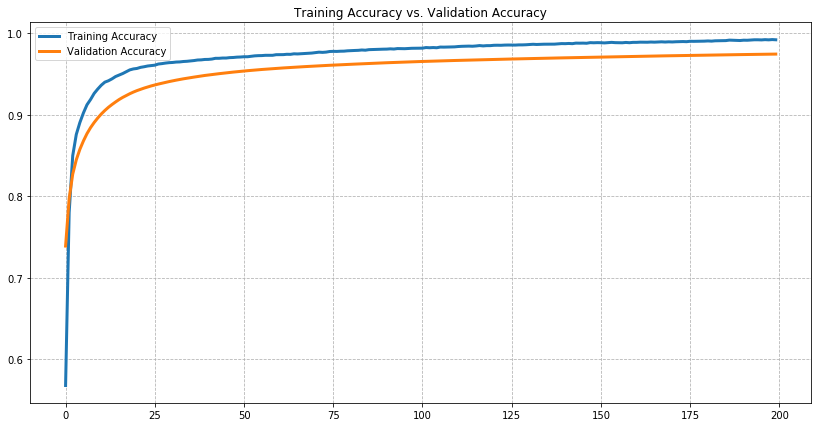

In [24]:
#collapse
plt.figure(figsize=(14,7))
plt.plot(acc.accuracies, label = "Training Accuracy", linewidth = "3")
plt.plot(acc.test_accuracies, label = "Validation Accuracy", linewidth = "3")
plt.legend(loc='upper left')
plt.grid('both', alpha = 0.95, linestyle="--")
plt.title("Training Accuracy vs. Validation Accuracy");

Not too bad! 

Usually when the epochs progress, if the training accuracy and validation accuracy differ widely and move away from each other, then it is a sign of *overfitting*.

In our case, there is a small "moving away" happening. But since it is not so singificant, we are allowed to call it a good performance. 

The intuition behind validation accuracy and training accuracy is that if your model ends up learning *too* well, then it wouldn't be able to generalize for any new data it sees. This is ,in fact, what we call overfitting.

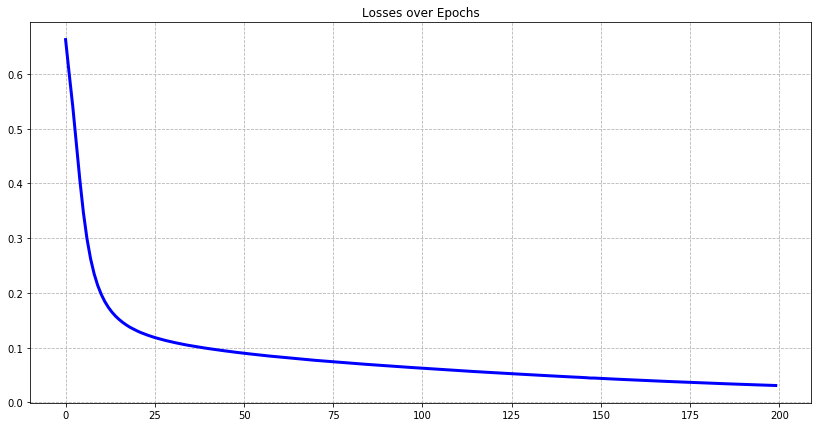

In [25]:
#collapse
plt.figure(figsize=(14,7))
plt.plot(acc.losses, linewidth = "3", color = "b")
plt.grid('both', alpha = 0.95, linestyle="--")
plt.title("Losses over Epochs");

The graph above is the loss we see over the epochs. Clearly, the model is learning to approach the global minima through gradient descent. 

(although it is important to note that we may not have reached it completely) 

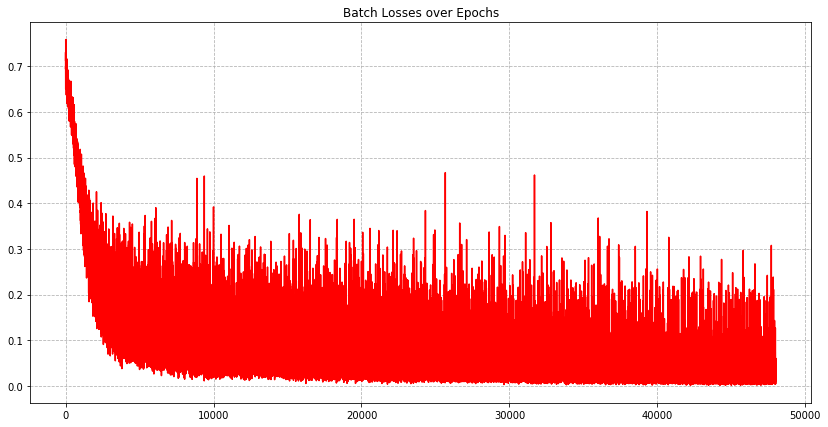

In [26]:
#collapse
plt.figure(figsize=(14,7))
plt.plot(acc.batch_losses, color = "r")
plt.grid('both', alpha = 0.95, linestyle="--")
plt.title("Batch Losses over Epochs");

### 4. Plot the results

Our accuracy is 99.2%. Nice!

In order to see this more clearly, tn the embedding space ( the inputs of the "logistic regression") I am now plotting the data points by running them forward through the network. 

By coloring coding them with their actual class and plotting the probability contours (these will all be lines in the embedding space as from here on, this is a logistic regression), we can bettersee the points stranded on the "wrong" side of the probability 1/2 line. 

I have also plotted the predictions against the actual values showing where they are in the embedding space.

I have also tried doing a 3D plot to see the Sigma shape of the logistics working. (X - first output from the affine layer; Y- second output from the affine layer; Z - the probability of the X,Y data)

In [27]:
#collapse
actual_inputs = np.concatenate((X_train, X_test))
actual_outputs = np.concatenate((y_train, y_test))
predicted_outputs =  1*(model(actual_inputs) >= 0.5)

In [47]:
#collapse
print("Your model accuracy is "+ str(np.mean(actual_outputs == predicted_outputs) * 100) +'.')

Your model accuracy is 99.10496921094085.


In [29]:
#collapse
#hide

#getting the last two layers for plotting
prob_layer = [Affine("output", 2, 1), Sigmoid("sigmoid")]
prob_model = Model(prob_layer)
prob_model.layers[0].params['w'] = model.layers[5].params['w']
prob_model.layers[0].params['b'] = model.layers[5].params['b']

In [30]:
#hide

#getting the layers upto the affine layer for plotting
visualize_layers = [Affine("first", 784, 100), Relu("relu"), Affine("second", 100, 100), Relu("relu"), Affine("third", 100, 2)]
visualize_model = Model(visualize_layers)

In [31]:
#hide
visualize_model.layers[0].params['w'] = model.layers[0].params['w']
visualize_model.layers[0].params['b'] = model.layers[0].params['b']
visualize_model.layers[2].params['w'] = model.layers[2].params['w']
visualize_model.layers[2].params['b'] = model.layers[0].params['b']
visualize_model.layers[4].params['w'] = model.layers[4].params['w']
visualize_model.layers[4].params['b'] = model.layers[4].params['b']

In [32]:
#hide
visualization_points_3 = visualize_model(data_3)
model_points_3 = model(data_3)

visualization_points_8 = visualize_model(data_8)
model_points_8 = model(data_8)

In [33]:
#collapse
visualize_model_1 = Model(layers[:-2])
plot_testing = visualize_model_1(X_test)

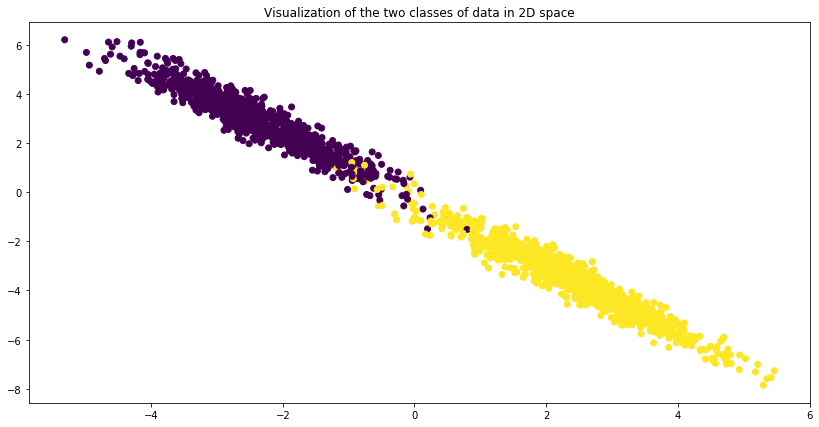

In [34]:
#collapse
plt.figure(figsize=(14,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], c = y_test.ravel());
plt.title("Visualization of the two classes of data in 2D space");

In [35]:
#collapse
#this would be our probability layer (last two layers)
model_prob = Model(layers[-2:])

In [36]:
#collapse
xgrid = np.linspace(-4, 1, 100) 
ygrid = np.linspace(-7.5, 7.5, 100) 
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100 -> we need to conver them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

# xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) 
X = X_interim.T

# We want a shape of n rows and 2 columns in order to be able to feed this to last affine
# This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) 

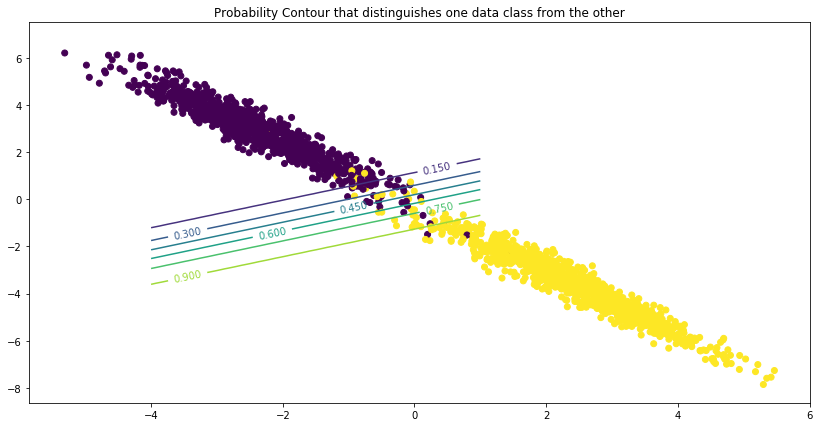

In [43]:
#collapse
plt.figure(figsize=(14,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );
plt.title("Probability Contour that distinguishes one data class from the other");

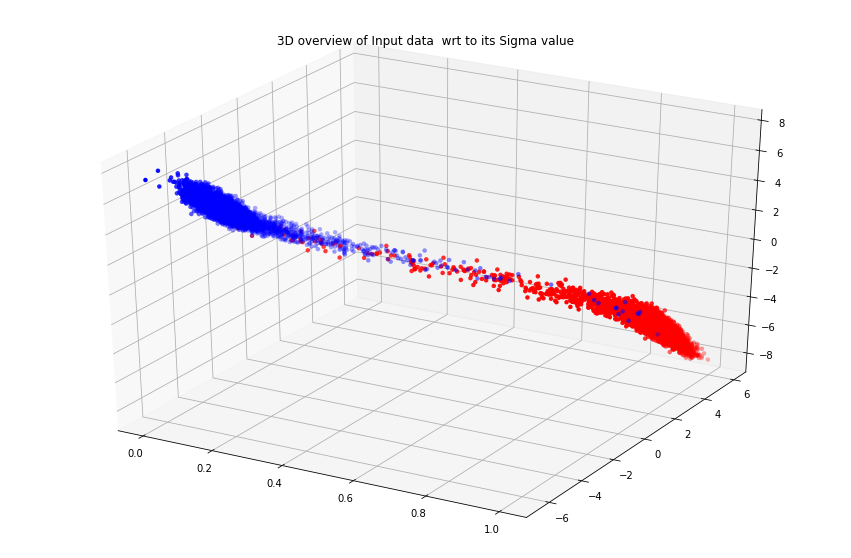

In [38]:
#collapse
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
from matplotlib import cm

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = prob_model(grid)


#contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter(model_points_3, visualization_points_3.T[0], visualization_points_3.T[1],linewidth=0, c='r')
ax.scatter(model_points_8, visualization_points_8.T[0], visualization_points_8.T[1],linewidth=0, c='b')
plt.title("3D overview of Input data  wrt to its Sigma value");
#ax.plot_surface(xx, yy, z, alpha=0.2)
#ax.view_init(elev=90, azim=75)

Super cool! 

Let's now do a simple Logistic Regression Model and compare it with the Neural Network we had constructed. 

It would be pretty interesting to see the difference in outcomes. 

In [39]:
#hide
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = AccCallback(learner2, config.bs)
learner2.set_callbacks([acc2])
learner2.train_loop(train_dl,X_test, y_test)

Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1037.12it/s]


Epoch: 0     Loss: 0.58236     Training Acc: 0.73335     Validation Acc: 0.85282


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1067.15it/s]


Epoch: 1     Loss: 0.47881     Training Acc: 0.85946     Validation Acc: 0.87147


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1016.04it/s]


Epoch: 2     Loss: 0.41954     Training Acc: 0.88291     Validation Acc: 0.8829


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1204.21it/s]


Epoch: 3     Loss: 0.37932     Training Acc: 0.89618     Validation Acc: 0.89025


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1025.33it/s]


Epoch: 4     Loss: 0.3501     Training Acc: 0.90452     Validation Acc: 0.89556


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 981.83it/s]


Epoch: 5     Loss: 0.32775     Training Acc: 0.90903     Validation Acc: 0.90012


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1061.31it/s]


Epoch: 6     Loss: 0.31002     Training Acc: 0.91295     Validation Acc: 0.90402


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1128.84it/s]


Epoch: 7     Loss: 0.29545     Training Acc: 0.91662     Validation Acc: 0.90738


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1160.38it/s]


Epoch: 8     Loss: 0.28323     Training Acc: 0.91946     Validation Acc: 0.91034


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1094.10it/s]


Epoch: 9     Loss: 0.27279     Training Acc: 0.92297     Validation Acc: 0.91321


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1007.11it/s]


Epoch: 10     Loss: 0.26373     Training Acc: 0.92464     Validation Acc: 0.91555


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1089.14it/s]


Epoch: 11     Loss: 0.25575     Training Acc: 0.92697     Validation Acc: 0.91763


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1108.27it/s]


Epoch: 12     Loss: 0.24869     Training Acc: 0.92831     Validation Acc: 0.91947


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1047.01it/s]


Epoch: 13     Loss: 0.24236     Training Acc: 0.92981     Validation Acc: 0.92112


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1243.92it/s]


Epoch: 14     Loss: 0.23665     Training Acc: 0.93081     Validation Acc: 0.92265


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1082.15it/s]


Epoch: 15     Loss: 0.23147     Training Acc: 0.93173     Validation Acc: 0.92411


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1156.87it/s]


Epoch: 16     Loss: 0.22673     Training Acc: 0.93265     Validation Acc: 0.9254


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1028.48it/s]


Epoch: 17     Loss: 0.22237     Training Acc: 0.93373     Validation Acc: 0.92658


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1337.11it/s]


Epoch: 18     Loss: 0.21836     Training Acc: 0.93532     Validation Acc: 0.92768


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1256.55it/s]


Epoch: 19     Loss: 0.21466     Training Acc: 0.93615     Validation Acc: 0.92873


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1063.47it/s]


Epoch: 20     Loss: 0.2112     Training Acc: 0.93691     Validation Acc: 0.9297


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1279.88it/s]


Epoch: 21     Loss: 0.20799     Training Acc: 0.93782     Validation Acc: 0.9306


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1109.72it/s]


Epoch: 22     Loss: 0.20498     Training Acc: 0.93874     Validation Acc: 0.93145


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1102.33it/s]


Epoch: 23     Loss: 0.20216     Training Acc: 0.93966     Validation Acc: 0.93225


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1044.83it/s]


Epoch: 24     Loss: 0.19951     Training Acc: 0.94041     Validation Acc: 0.93302


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1208.80it/s]


Epoch: 25     Loss: 0.19701     Training Acc: 0.9415     Validation Acc: 0.93376


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1018.76it/s]


Epoch: 26     Loss: 0.19466     Training Acc: 0.94208     Validation Acc: 0.93448


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1190.79it/s]


Epoch: 27     Loss: 0.19244     Training Acc: 0.9425     Validation Acc: 0.93518


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1171.87it/s]


Epoch: 28     Loss: 0.19032     Training Acc: 0.94316     Validation Acc: 0.93585


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1041.07it/s]


Epoch: 29     Loss: 0.18832     Training Acc: 0.94408     Validation Acc: 0.93651


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1083.25it/s]


Epoch: 30     Loss: 0.18641     Training Acc: 0.94425     Validation Acc: 0.93711


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1118.06it/s]


Epoch: 31     Loss: 0.1846     Training Acc: 0.94517     Validation Acc: 0.93769


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1226.20it/s]


Epoch: 32     Loss: 0.18287     Training Acc: 0.9455     Validation Acc: 0.93823


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1022.01it/s]


Epoch: 33     Loss: 0.18121     Training Acc: 0.94617     Validation Acc: 0.93875


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1058.35it/s]


Epoch: 34     Loss: 0.17964     Training Acc: 0.9465     Validation Acc: 0.93926


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1111.24it/s]


Epoch: 35     Loss: 0.17813     Training Acc: 0.94675     Validation Acc: 0.93974


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1121.63it/s]


Epoch: 36     Loss: 0.17668     Training Acc: 0.94684     Validation Acc: 0.94021


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1149.25it/s]


Epoch: 37     Loss: 0.17529     Training Acc: 0.94725     Validation Acc: 0.94068


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1075.34it/s]


Epoch: 38     Loss: 0.17396     Training Acc: 0.94742     Validation Acc: 0.94113


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1184.93it/s]


Epoch: 39     Loss: 0.17268     Training Acc: 0.94784     Validation Acc: 0.94157


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1045.80it/s]


Epoch: 40     Loss: 0.17144     Training Acc: 0.94767     Validation Acc: 0.94197


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 999.87it/s]


Epoch: 41     Loss: 0.17026     Training Acc: 0.94842     Validation Acc: 0.94236


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1075.82it/s]


Epoch: 42     Loss: 0.16911     Training Acc: 0.94884     Validation Acc: 0.94273


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1020.78it/s]


Epoch: 43     Loss: 0.16801     Training Acc: 0.94901     Validation Acc: 0.94311


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1132.77it/s]


Epoch: 44     Loss: 0.16694     Training Acc: 0.94934     Validation Acc: 0.94348


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1173.57it/s]


Epoch: 45     Loss: 0.16591     Training Acc: 0.94959     Validation Acc: 0.94383


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1213.03it/s]


Epoch: 46     Loss: 0.16491     Training Acc: 0.94976     Validation Acc: 0.94419


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1179.02it/s]


Epoch: 47     Loss: 0.16397     Training Acc: 0.95001     Validation Acc: 0.94452


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 952.05it/s]


Epoch: 48     Loss: 0.16303     Training Acc: 0.95018     Validation Acc: 0.94483


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1171.44it/s]


Epoch: 49     Loss: 0.16213     Training Acc: 0.95068     Validation Acc: 0.94514


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1085.08it/s]


Epoch: 50     Loss: 0.16125     Training Acc: 0.95084     Validation Acc: 0.94545


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1075.17it/s]


Epoch: 51     Loss: 0.1604     Training Acc: 0.95084     Validation Acc: 0.94574


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1080.70it/s]


Epoch: 52     Loss: 0.15959     Training Acc: 0.95093     Validation Acc: 0.94603


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1000.14it/s]


Epoch: 53     Loss: 0.15879     Training Acc: 0.95109     Validation Acc: 0.94631


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1107.77it/s]


Epoch: 54     Loss: 0.15801     Training Acc: 0.95126     Validation Acc: 0.94658


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1114.12it/s]


Epoch: 55     Loss: 0.15726     Training Acc: 0.95126     Validation Acc: 0.94686


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1081.06it/s]


Epoch: 56     Loss: 0.15652     Training Acc: 0.95143     Validation Acc: 0.94715


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 955.17it/s]


Epoch: 57     Loss: 0.15581     Training Acc: 0.95184     Validation Acc: 0.94743


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1023.04it/s]


Epoch: 58     Loss: 0.15512     Training Acc: 0.95209     Validation Acc: 0.94771


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1063.16it/s]


Epoch: 59     Loss: 0.15445     Training Acc: 0.95209     Validation Acc: 0.94798


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1063.16it/s]


Epoch: 60     Loss: 0.15379     Training Acc: 0.95243     Validation Acc: 0.94825


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1107.78it/s]


Epoch: 61     Loss: 0.15315     Training Acc: 0.95276     Validation Acc: 0.94851


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1104.31it/s]


Epoch: 62     Loss: 0.15252     Training Acc: 0.95276     Validation Acc: 0.94876


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1090.53it/s]


Epoch: 63     Loss: 0.15192     Training Acc: 0.95318     Validation Acc: 0.949


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1066.89it/s]


Epoch: 64     Loss: 0.15132     Training Acc: 0.95326     Validation Acc: 0.94923


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1162.74it/s]


Epoch: 65     Loss: 0.15074     Training Acc: 0.95368     Validation Acc: 0.94946


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 967.40it/s]


Epoch: 66     Loss: 0.15018     Training Acc: 0.95376     Validation Acc: 0.94968


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1081.59it/s]


Epoch: 67     Loss: 0.14962     Training Acc: 0.95376     Validation Acc: 0.94989


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1090.98it/s]


Epoch: 68     Loss: 0.14908     Training Acc: 0.9541     Validation Acc: 0.95009


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1127.44it/s]


Epoch: 69     Loss: 0.14855     Training Acc: 0.9541     Validation Acc: 0.95029


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1048.15it/s]


Epoch: 70     Loss: 0.14804     Training Acc: 0.95418     Validation Acc: 0.95048


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 999.09it/s]


Epoch: 71     Loss: 0.14754     Training Acc: 0.95443     Validation Acc: 0.95067


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1181.81it/s]


Epoch: 72     Loss: 0.14704     Training Acc: 0.95435     Validation Acc: 0.95085


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1247.78it/s]


Epoch: 73     Loss: 0.14655     Training Acc: 0.95477     Validation Acc: 0.95103


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1004.46it/s]


Epoch: 74     Loss: 0.14609     Training Acc: 0.95468     Validation Acc: 0.95121


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1010.18it/s]


Epoch: 75     Loss: 0.14562     Training Acc: 0.95493     Validation Acc: 0.95139


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1068.63it/s]


Epoch: 76     Loss: 0.14517     Training Acc: 0.95493     Validation Acc: 0.95156


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1199.30it/s]


Epoch: 77     Loss: 0.14473     Training Acc: 0.9551     Validation Acc: 0.95173


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1062.90it/s]


Epoch: 78     Loss: 0.14429     Training Acc: 0.95493     Validation Acc: 0.95189


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1088.88it/s]


Epoch: 79     Loss: 0.14386     Training Acc: 0.95527     Validation Acc: 0.95205


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 947.11it/s]


Epoch: 80     Loss: 0.14345     Training Acc: 0.95577     Validation Acc: 0.9522


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1163.47it/s]


Epoch: 81     Loss: 0.14304     Training Acc: 0.95593     Validation Acc: 0.95234


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1048.25it/s]


Epoch: 82     Loss: 0.14264     Training Acc: 0.95602     Validation Acc: 0.95249


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1089.41it/s]


Epoch: 83     Loss: 0.14224     Training Acc: 0.95627     Validation Acc: 0.95263


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 966.54it/s]


Epoch: 84     Loss: 0.14185     Training Acc: 0.95627     Validation Acc: 0.95276


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1014.88it/s]


Epoch: 85     Loss: 0.14147     Training Acc: 0.95643     Validation Acc: 0.9529


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1103.00it/s]


Epoch: 86     Loss: 0.14109     Training Acc: 0.95618     Validation Acc: 0.95303


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1149.15it/s]


Epoch: 87     Loss: 0.14074     Training Acc: 0.95694     Validation Acc: 0.95315


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 925.83it/s]


Epoch: 88     Loss: 0.14037     Training Acc: 0.95669     Validation Acc: 0.95328


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 963.67it/s]


Epoch: 89     Loss: 0.14002     Training Acc: 0.95702     Validation Acc: 0.9534


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 983.09it/s]


Epoch: 90     Loss: 0.13967     Training Acc: 0.95685     Validation Acc: 0.95352


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1031.05it/s]


Epoch: 91     Loss: 0.13933     Training Acc: 0.95685     Validation Acc: 0.95363


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1026.80it/s]


Epoch: 92     Loss: 0.139     Training Acc: 0.95727     Validation Acc: 0.95375


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 924.05it/s]


Epoch: 93     Loss: 0.13866     Training Acc: 0.95702     Validation Acc: 0.95388


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1069.31it/s]


Epoch: 94     Loss: 0.13835     Training Acc: 0.95735     Validation Acc: 0.954


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1140.61it/s]


Epoch: 95     Loss: 0.13803     Training Acc: 0.95727     Validation Acc: 0.95412


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1145.48it/s]


Epoch: 96     Loss: 0.13771     Training Acc: 0.95727     Validation Acc: 0.95424


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1236.61it/s]


Epoch: 97     Loss: 0.13741     Training Acc: 0.95744     Validation Acc: 0.95436


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 953.45it/s]


Epoch: 98     Loss: 0.1371     Training Acc: 0.9576     Validation Acc: 0.95448


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 961.95it/s]


Epoch: 99     Loss: 0.13681     Training Acc: 0.9576     Validation Acc: 0.9546


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1077.87it/s]


Epoch: 100     Loss: 0.13651     Training Acc: 0.95777     Validation Acc: 0.95472


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1002.61it/s]


Epoch: 101     Loss: 0.13622     Training Acc: 0.95802     Validation Acc: 0.95483


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.79it/s]


Epoch: 102     Loss: 0.13594     Training Acc: 0.95794     Validation Acc: 0.95494


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1035.07it/s]


Epoch: 103     Loss: 0.13566     Training Acc: 0.9581     Validation Acc: 0.95505


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1139.48it/s]


Epoch: 104     Loss: 0.13538     Training Acc: 0.95835     Validation Acc: 0.95516


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1068.18it/s]


Epoch: 105     Loss: 0.13511     Training Acc: 0.95827     Validation Acc: 0.95526


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 996.72it/s]


Epoch: 106     Loss: 0.13484     Training Acc: 0.95835     Validation Acc: 0.95536


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 962.82it/s]


Epoch: 107     Loss: 0.13457     Training Acc: 0.95844     Validation Acc: 0.95546


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 919.55it/s]


Epoch: 108     Loss: 0.13431     Training Acc: 0.95869     Validation Acc: 0.95556


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1263.21it/s]


Epoch: 109     Loss: 0.13406     Training Acc: 0.95852     Validation Acc: 0.95566


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1209.93it/s]


Epoch: 110     Loss: 0.1338     Training Acc: 0.9586     Validation Acc: 0.95575


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 998.65it/s]


Epoch: 111     Loss: 0.13355     Training Acc: 0.95877     Validation Acc: 0.95585


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1099.06it/s]


Epoch: 112     Loss: 0.13331     Training Acc: 0.95885     Validation Acc: 0.95594


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1173.52it/s]


Epoch: 113     Loss: 0.13307     Training Acc: 0.95911     Validation Acc: 0.95603


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1132.42it/s]


Epoch: 114     Loss: 0.13283     Training Acc: 0.95885     Validation Acc: 0.95612


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1011.53it/s]


Epoch: 115     Loss: 0.13259     Training Acc: 0.95919     Validation Acc: 0.95621


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 942.08it/s]


Epoch: 116     Loss: 0.13235     Training Acc: 0.95894     Validation Acc: 0.9563


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 903.40it/s]


Epoch: 117     Loss: 0.13213     Training Acc: 0.95936     Validation Acc: 0.95639


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.00it/s]


Epoch: 118     Loss: 0.1319     Training Acc: 0.95911     Validation Acc: 0.95648


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.42it/s]


Epoch: 119     Loss: 0.13168     Training Acc: 0.95927     Validation Acc: 0.95656


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1016.79it/s]


Epoch: 120     Loss: 0.13146     Training Acc: 0.95936     Validation Acc: 0.95664


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.99it/s]


Epoch: 121     Loss: 0.13124     Training Acc: 0.95911     Validation Acc: 0.95673


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.67it/s]


Epoch: 122     Loss: 0.13103     Training Acc: 0.95944     Validation Acc: 0.95681


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.64it/s]


Epoch: 123     Loss: 0.13081     Training Acc: 0.95919     Validation Acc: 0.95689


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1075.85it/s]


Epoch: 124     Loss: 0.1306     Training Acc: 0.95927     Validation Acc: 0.95697


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1031.08it/s]


Epoch: 125     Loss: 0.1304     Training Acc: 0.95936     Validation Acc: 0.95705


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1120.73it/s]


Epoch: 126     Loss: 0.13019     Training Acc: 0.95944     Validation Acc: 0.95712


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 725.13it/s]


Epoch: 127     Loss: 0.12999     Training Acc: 0.95952     Validation Acc: 0.9572


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.58it/s]


Epoch: 128     Loss: 0.12979     Training Acc: 0.95969     Validation Acc: 0.95727


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 991.97it/s]


Epoch: 129     Loss: 0.1296     Training Acc: 0.95986     Validation Acc: 0.95734


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1030.76it/s]


Epoch: 130     Loss: 0.1294     Training Acc: 0.95994     Validation Acc: 0.95742


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1030.99it/s]


Epoch: 131     Loss: 0.12921     Training Acc: 0.95977     Validation Acc: 0.95749


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1052.59it/s]


Epoch: 132     Loss: 0.12902     Training Acc: 0.95994     Validation Acc: 0.95757


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1057.89it/s]


Epoch: 133     Loss: 0.12883     Training Acc: 0.96027     Validation Acc: 0.95764


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1137.73it/s]


Epoch: 134     Loss: 0.12865     Training Acc: 0.96011     Validation Acc: 0.95771


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1094.29it/s]


Epoch: 135     Loss: 0.12847     Training Acc: 0.96002     Validation Acc: 0.95778


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 931.11it/s]


Epoch: 136     Loss: 0.12828     Training Acc: 0.96027     Validation Acc: 0.95786


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1140.28it/s]


Epoch: 137     Loss: 0.1281     Training Acc: 0.96011     Validation Acc: 0.95793


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 989.77it/s]


Epoch: 138     Loss: 0.12793     Training Acc: 0.96052     Validation Acc: 0.958


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1048.22it/s]


Epoch: 139     Loss: 0.12775     Training Acc: 0.96027     Validation Acc: 0.95807


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1093.93it/s]


Epoch: 140     Loss: 0.12758     Training Acc: 0.96019     Validation Acc: 0.95814


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1082.74it/s]


Epoch: 141     Loss: 0.12741     Training Acc: 0.96036     Validation Acc: 0.9582


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1068.06it/s]


Epoch: 142     Loss: 0.12724     Training Acc: 0.96011     Validation Acc: 0.95827


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1018.57it/s]


Epoch: 143     Loss: 0.12707     Training Acc: 0.96036     Validation Acc: 0.95834


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 968.24it/s]


Epoch: 144     Loss: 0.12691     Training Acc: 0.96044     Validation Acc: 0.9584


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.65it/s]


Epoch: 145     Loss: 0.12674     Training Acc: 0.96044     Validation Acc: 0.95847


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 950.41it/s]


Epoch: 146     Loss: 0.12658     Training Acc: 0.96061     Validation Acc: 0.95853


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 750.50it/s]


Epoch: 147     Loss: 0.12642     Training Acc: 0.96061     Validation Acc: 0.95859


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 768.87it/s]


Epoch: 148     Loss: 0.12626     Training Acc: 0.96069     Validation Acc: 0.95866


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 935.19it/s]


Epoch: 149     Loss: 0.1261     Training Acc: 0.96077     Validation Acc: 0.95872


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 998.46it/s]


Epoch: 150     Loss: 0.12595     Training Acc: 0.96052     Validation Acc: 0.95878


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 976.58it/s]


Epoch: 151     Loss: 0.1258     Training Acc: 0.96069     Validation Acc: 0.95884


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1033.52it/s]


Epoch: 152     Loss: 0.12564     Training Acc: 0.96086     Validation Acc: 0.95889


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.59it/s]


Epoch: 153     Loss: 0.12549     Training Acc: 0.96094     Validation Acc: 0.95895


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.14it/s]


Epoch: 154     Loss: 0.12535     Training Acc: 0.96086     Validation Acc: 0.95901


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.39it/s]


Epoch: 155     Loss: 0.1252     Training Acc: 0.96094     Validation Acc: 0.95906


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.48it/s]


Epoch: 156     Loss: 0.12505     Training Acc: 0.96086     Validation Acc: 0.95912


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 938.18it/s]


Epoch: 157     Loss: 0.12491     Training Acc: 0.96094     Validation Acc: 0.95917


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 928.99it/s]


Epoch: 158     Loss: 0.12476     Training Acc: 0.96086     Validation Acc: 0.95923


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 909.44it/s]


Epoch: 159     Loss: 0.12462     Training Acc: 0.96111     Validation Acc: 0.95928


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.54it/s]


Epoch: 160     Loss: 0.12448     Training Acc: 0.96111     Validation Acc: 0.95933


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1019.77it/s]


Epoch: 161     Loss: 0.12434     Training Acc: 0.96102     Validation Acc: 0.95938


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1050.80it/s]


Epoch: 162     Loss: 0.12421     Training Acc: 0.96119     Validation Acc: 0.95944


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1088.48it/s]


Epoch: 163     Loss: 0.12407     Training Acc: 0.96128     Validation Acc: 0.95949


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1096.15it/s]


Epoch: 164     Loss: 0.12393     Training Acc: 0.96119     Validation Acc: 0.95954


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 984.14it/s]


Epoch: 165     Loss: 0.1238     Training Acc: 0.96111     Validation Acc: 0.95959


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1031.41it/s]


Epoch: 166     Loss: 0.12367     Training Acc: 0.96119     Validation Acc: 0.95964


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1165.49it/s]


Epoch: 167     Loss: 0.12354     Training Acc: 0.96128     Validation Acc: 0.95968


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1102.29it/s]


Epoch: 168     Loss: 0.1234     Training Acc: 0.96136     Validation Acc: 0.95973


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1097.71it/s]


Epoch: 169     Loss: 0.12328     Training Acc: 0.96128     Validation Acc: 0.95978


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1033.00it/s]


Epoch: 170     Loss: 0.12315     Training Acc: 0.96136     Validation Acc: 0.95982


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1203.18it/s]


Epoch: 171     Loss: 0.12302     Training Acc: 0.96144     Validation Acc: 0.95986


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1114.26it/s]


Epoch: 172     Loss: 0.12289     Training Acc: 0.96144     Validation Acc: 0.95991


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1108.02it/s]


Epoch: 173     Loss: 0.12277     Training Acc: 0.96144     Validation Acc: 0.95995


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 979.38it/s]


Epoch: 174     Loss: 0.12265     Training Acc: 0.96153     Validation Acc: 0.95999


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 996.18it/s]


Epoch: 175     Loss: 0.12253     Training Acc: 0.96161     Validation Acc: 0.96004


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1142.69it/s]


Epoch: 176     Loss: 0.12241     Training Acc: 0.96153     Validation Acc: 0.96008


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1238.33it/s]


Epoch: 177     Loss: 0.12228     Training Acc: 0.96169     Validation Acc: 0.96012


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1169.32it/s]


Epoch: 178     Loss: 0.12217     Training Acc: 0.96178     Validation Acc: 0.96017


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 943.04it/s]


Epoch: 179     Loss: 0.12205     Training Acc: 0.96178     Validation Acc: 0.96021


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1050.26it/s]


Epoch: 180     Loss: 0.12194     Training Acc: 0.96194     Validation Acc: 0.96025


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 984.84it/s]


Epoch: 181     Loss: 0.12182     Training Acc: 0.96178     Validation Acc: 0.96029


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 939.59it/s]


Epoch: 182     Loss: 0.1217     Training Acc: 0.96178     Validation Acc: 0.96033


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 995.21it/s]


Epoch: 183     Loss: 0.12159     Training Acc: 0.96194     Validation Acc: 0.96036


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1040.18it/s]


Epoch: 184     Loss: 0.12148     Training Acc: 0.96194     Validation Acc: 0.9604


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1131.74it/s]


Epoch: 185     Loss: 0.12136     Training Acc: 0.96194     Validation Acc: 0.96044


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1079.32it/s]


Epoch: 186     Loss: 0.12126     Training Acc: 0.96194     Validation Acc: 0.96048


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1068.96it/s]


Epoch: 187     Loss: 0.12115     Training Acc: 0.96194     Validation Acc: 0.96051


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 961.29it/s]


Epoch: 188     Loss: 0.12104     Training Acc: 0.96194     Validation Acc: 0.96055


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1022.65it/s]


Epoch: 189     Loss: 0.12093     Training Acc: 0.96203     Validation Acc: 0.96058


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1032.12it/s]


Epoch: 190     Loss: 0.12082     Training Acc: 0.96203     Validation Acc: 0.96062


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1043.49it/s]


Epoch: 191     Loss: 0.12071     Training Acc: 0.96194     Validation Acc: 0.96065


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.09it/s]


Epoch: 192     Loss: 0.12061     Training Acc: 0.96228     Validation Acc: 0.96069


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1001.63it/s]


Epoch: 193     Loss: 0.1205     Training Acc: 0.96211     Validation Acc: 0.96072


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 934.94it/s]


Epoch: 194     Loss: 0.1204     Training Acc: 0.96211     Validation Acc: 0.96075


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1020.08it/s]


Epoch: 195     Loss: 0.1203     Training Acc: 0.96211     Validation Acc: 0.96079


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 999.99it/s]


Epoch: 196     Loss: 0.12019     Training Acc: 0.96219     Validation Acc: 0.96082


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1011.86it/s]


Epoch: 197     Loss: 0.12009     Training Acc: 0.96211     Validation Acc: 0.96085


Batch: 100%|███████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1162.37it/s]


Epoch: 198     Loss: 0.11999     Training Acc: 0.96228     Validation Acc: 0.96088


Batch: 100%|████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 962.37it/s]


Epoch: 199     Loss: 0.11989     Training Acc: 0.96236     Validation Acc: 0.96091


0.09501025331349161

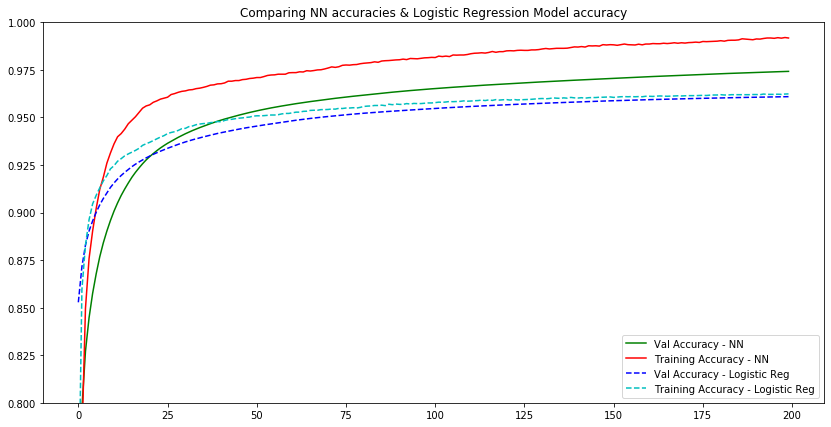

In [40]:
#collapse
plt.figure(figsize=(14,7))
plt.plot(acc.test_accuracies, 'g-', label = "Val Accuracy - NN")
plt.plot(acc.accuracies, 'r-', label = "Training Accuracy - NN")
plt.plot(acc2.test_accuracies, 'b-',linestyle="--", label = "Val Accuracy - Logistic Reg")
plt.plot(acc2.accuracies, 'c-',linestyle="--", label = "Training Accuracy - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()
plt.title("Comparing NN accuracies & Logistic Regression Model accuracy");

In [48]:
#collapse
actual_inputs = np.concatenate((X_train, X_test))
actual_outputs = np.concatenate((y_train, y_test))
predicted_outputs =  1*(model_logistic(actual_inputs) >= 0.5)

print("Your model accuracy is "+ str(np.mean(actual_outputs == predicted_outputs) * 100) +'.')

Your model accuracy is 96.28383216382643.


...And the winner is our lovely Neural Network model!

Looking at this graph, clearly the Neural network performed better than our simple logistics model. 

## Beauty of Neural Networks

Now that we've seen both these different types of models performing, you might have the question - why and how is it doing what it does?

Well, Neural networks are absolutely brilliant in the way they work - and brilliance doesn't really need to equate itself with being increasingly complex. With the right mindset and understanding, you will come to realize the beauty in the simplicity of how it works. 

As a matter of fact, the Universal Approximation Theorem ,to me, is the theoretical foundation of why neural networks work.

It states that a neural network with one hidden layer containing a sufficient but finite number of neurons can approximate any continuous function to a reasonable accuracy, under certain conditions for activation functions (namely, that they must be sigmoid-like).

It was formulated in 1989 by George Cybenko only for sigmoid activations - however later on it was proven by Kurt Hornik in 1991 that it can be applied to all activation functions.

Hornik also came to realize that the architecture of the neural network, not the choice of function, was the key deciding factor for the performance- and this discovery was significant in sparking the exciting developement of neural networks into the variety of applications it does today. 

I believe that understanding it might be a good step towards understanding truly how these networks work. 

Without delving too much into the details and mathematics of it, the key point of how the Universal Approximation theory works is the following -

>Instead of trying to create a complex function that maps your inputs to your outputs, divide your function into smaller peices and assign a neuron performing simple linear manipulations to each of these less complicated peices to represent it.

One of my favorite teachers is Grant from 3Blue1Brown and the one thing that stuck with me from his videos is that given any complex problem, always try to break it down to its most simplest form. 

And this is what we are doing here!

One of the things to note however is that the Universal Approximation theorm *isn't meant to generalize well.*

Wait, what?

Yes - neural networks generally just pose as great approximators but if you provide it with a value outside the range of the inputs, it would most probably fail. 

This is sorta similar to the limited Taylor series apprixmation that models a sine wave in a certain range but it goes bezerk ourside of it. 

Ultimately, neural networks are really estimators that are able to solve multi-dimensional problems and this is quite impressive by itself. 

I understand that there are a lot of perspectives and there's so much to explore! And that is exactly what makes this field exciting. 

At the end, if there's one of many things humanity can be proud, then it's definately the fact that we taught our computers to distingush cats and dogs! 

